In [1]:
#importing the required libraries
import math 
import numpy as np
import random
import collections


# 8 Queens Problem

In [2]:
#initialisations
#this includes the various dictionaries and lists 
#used for assistance

#lists and maps
new_algo_entries={}
possible_ans_2=[]

#map for charcter and vice versa conversions
char_to_int={}
int_to_char={}
c='1'
for i in range(1,9):
    int_to_char[i]=c
    char_to_int[c]=i
    c=chr(ord(c)+1)
    
    


#initialisng the initial population for both the algorithm
pos=random.randint(1,8)
s=""
for i in range(8):
    s+=(int_to_char[pos])

l1=[s for i in range(20)]


In [3]:
# all the helper functions 
#required to run 8 queens algorithm

#reproduction
def reproduce_new(s1,s2):
    list1=random.sample(range(0,8),3)
    list1.sort()
    
    sa=s1[0:list1[0]]
    sb=s1[list1[0]:list1[1]]
    sc=s1[list1[1]:list1[2]]
    sd=s1[list1[2]:]
    
    
    s21=s2[0:list1[0]]
    s22=s2[list1[0]:list1[1]]
    s23=s2[list1[1]:list1[2]]
    s24=s2[list1[2]:]

    list_kids=[]
    list_kids.append(sa+sb+s23+s24)
    list_kids.append(sa+s22+sc+s24)
    list_kids.append(sa+s22+s23+sd)
    list_kids.append(s21+s22+sc+sd)
    list_kids.append(s21+sb+s23+sd)
    list_kids.append(s21+sb+sc+s24)
    
    return list_kids

#mutation
def mutate_new(a):
    idx=random.randint(0,7)
    curr=char_to_int[a[idx]]
    n3=curr
    n1=-1
    n2=-1
    
    if (idx!=0):
        n1=char_to_int[a[idx-1]]
    if (idx!=len(a)-1):
        n2=char_to_int[a[idx+1]]
        
    while(curr==n3 or curr==n1 or curr==n2):
        curr=random.randint(1,8)
        
    ans=""
    for i in range(len(a)):
        if(i==idx):
            ans+=int_to_char[curr]
        else:
            ans+=a[i]
    return ans


#returns fitness value of an individual
def fitness_function(a):
    power=29
    total=0
    for i in range(8):
        col_no=i
        row_no=(int)(a[i])-1
        x=0
        for j in range(8):
            if (j!=i):
                c_no=j
                r_no=(int)(a[j])-1
                if (r_no==row_no):
                    x+=1
                if (r_no+c_no==row_no+col_no):
                    x+=1
                if (r_no-c_no==row_no-col_no):
                    x+=1
        total+=x
    total=total/2
    power-=total
    return power
    

def random_selection(population):
    n=len(population)
    #calculate fitness function value for each individual
    fitness_values=[]
    for i in range(n):
        fitness_values.append(fitness_function(population[i]))
    return random.choices(population,weights=fitness_values,k=1)[0]



def genetic_algo_new(population):
    x_counter=1000
    gen_no=1
    #clearing the required lists and dictionaries
    possible_ans_2.clear()
    new_algo_entries.clear()
    flag=False
    while(x_counter!=0):
        x_counter-=1
        
        n=len(population)
        
        average=0
        for i in range(n):
            average=max(fitness_function(population[i]),average)
        
        new_algo_entries[gen_no]=average
        gen_no+=1
        
        
        the_remaining_pop=[]
        new_population=[]
        for i in range(n):
            s1=random_selection(population)
            s2=random_selection(population)
            
            list1=reproduce_new(s1,s2)
            
            child1=-1
            child2=-1
            f_val=-1
            for i in range(6):
                if(f_val < fitness_function(list1[i])):
                    f_val=fitness_function(list1[i])
                    child1=i
            f_val=-1       
            for i in range(6):
                if(f_val < fitness_function(list1[i])  and i!=child1):
                    f_val=fitness_function(list1[i])
                    child2=i
                    
            
            p=random.random()
            lt1=[]
            if((p>=0.4) or (p>=0.1 and gen_no<=100)):
                lt1.append(mutate_new(list1[child1]))
                lt1.append(mutate_new(list1[child2]))
                the_remaining_pop.append(lt1[1])
                new_population.append(lt1[0])
                
            else:
                lt1.append((list1[child1]))
                lt1.append((list1[child2]))
                the_remaining_pop.append(lt1[1])
                new_population.append(lt1[0])
                
                
            
            
        fitness_values=[]
        for i in range(n):
            fitness_values.append(fitness_function(the_remaining_pop[i]))
        x=random.choices(the_remaining_pop,weights=fitness_values,k=5)
        new_population=new_population+x
        population=new_population
        
        
        for i in range(len(population)):
            if (fitness_function(population[i])==29):
                flag=True
                possible_ans_2.append(population[i])
                gen_no+=1
                new_algo_entries[gen_no]=29
                break
            
        
        if (flag==True):
            break
                
                
    if (flag==True):
        for i in range(len(possible_ans_2)):
            if (fitness_function(possible_ans_2[i])==29):
                return possible_ans_2[i]
        
        
    idx=-1
    f_val=-1
    for i in range(len(population)):
        if (f_val < fitness_function(population[i])):
            f_val=fitness_function(population[i])
            idx=i
            
    return population[idx]
    


# Travelling Salesman Problem

In [4]:
#initialisations
#this includes the various dictionaries and lists 
#used for assistance

#dictionary and lists used 
INT_MAX = 1000
a=[]
for i in range(14):
    ax=[0 for i in range(14)]
    a.append(ax)
    

a[0]  = [0, INT_MAX, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 150, INT_MAX, INT_MAX, 200, INT_MAX, 120, INT_MAX, INT_MAX]
a[1]  = [INT_MAX, 0, INT_MAX, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 190, 400, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 130]
a[2]  = [INT_MAX, INT_MAX, 0, 600, 220, 400, INT_MAX, INT_MAX, 200, INT_MAX, INT_MAX, INT_MAX, INT_MAX, INT_MAX]
a[3]  = [INT_MAX, INT_MAX, 600, 0, INT_MAX, 210, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 300, INT_MAX, INT_MAX, INT_MAX]
a[4]  = [INT_MAX, INT_MAX, 220, INT_MAX, 0, INT_MAX, INT_MAX, INT_MAX, 180, INT_MAX, INT_MAX, INT_MAX, INT_MAX, INT_MAX]
a[5]  = [INT_MAX, INT_MAX, 400, 210, INT_MAX, 0, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 370, 600, 260, 900]
a[6]  = [150, INT_MAX, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 0, INT_MAX, INT_MAX, INT_MAX, 550, 180, INT_MAX, INT_MAX]
a[7]  = [INT_MAX, 190, INT_MAX, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 0, INT_MAX, 560, INT_MAX, INT_MAX, INT_MAX, 170]
a[8]  = [INT_MAX, 400, 200, INT_MAX, 180, INT_MAX, INT_MAX, INT_MAX, 0, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 600]
a[9]  = [200, INT_MAX, INT_MAX, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 560, INT_MAX, 0, INT_MAX, 160, INT_MAX, 500]
a[10] = [INT_MAX, INT_MAX, INT_MAX, 300, INT_MAX, 370, 550, INT_MAX, INT_MAX, INT_MAX, 0, INT_MAX, 240, INT_MAX]
a[11] = [120, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 600, 180, INT_MAX, INT_MAX, 160, INT_MAX, 0, 400, INT_MAX]
a[12] = [INT_MAX, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 260, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 240, 400, 0, INT_MAX]
a[13] = [INT_MAX, 130, INT_MAX, INT_MAX, INT_MAX, 900, INT_MAX, 170, 600, 500, INT_MAX, INT_MAX, INT_MAX, 0]



s_tsp="abcdefghijklmn"
l1_tsp=[]
for i in range(len(s_tsp)):
    l1_tsp.append(s_tsp[i])

    

distances={}

c=0

for x in l1_tsp:
    distances[x]={}
    c2=0
    for ele in l1_tsp:
        if (a[c][c2]==1000):
            distances[x][ele]=a[c][c2]
        else:
            distances[x][ele]=a[c][c2]/10
            
        c2+=1
    c+=1
 
 
#dictionary and lists needed for assistance
population_tsp=["abcdefghijklmn" for i in range(20)]
new_algo_entries_tsp={}
possible_ans_tsp_2=[]


In [13]:
#all the helper functions for TSP
def reproduce_tsp_edited(s1,s2):
    n=len(s1)
    
    list1=random.sample(range(0,n),3)
    
    list1.sort()
    
    
    list_ans=[]
    #creating the first kid
    sa=s1[0:list1[0]]
    
    l2=[]
    
    for i in range(n):
        if (s2[i] in sa):
            continue
        else:
            l2.append(s2[i])
            
    s=sa
    for i in range(len(l2)):
        s+=l2[i]
        
    list_ans.append(s)
    
    #creating the second child
    sa=s1[list1[0]:list1[1]]
    
    l2=[]
    for i in range(n):
        if (s2[i] in sa):
            continue
        else:
            l2.append(s2[i])
    s=""
    j=0
    for i in range(0,list1[0]):
        s+=l2[j]
        j+=1
    
    for i in range(list1[0],list1[1]):
        s+=s1[i]
        
    for i in range(list1[1],n):
        s+=l2[j]
        j+=1
        
    list_ans.append(s)
    
    #creating the third child
    sa=s1[list1[1]:list1[2]]
    
    l2=[]
    for i in range(n):
        if (s2[i] in sa):
            continue
        else:
            l2.append(s2[i])
    s=""
    j=0
    for i in range(0,list1[1]):
        s+=l2[j]
        j+=1
    
    for i in range(list1[1],list1[2]):
        s+=s1[i]
        
    for i in range(list1[2],n):
        s+=l2[j]
        j+=1
        
    list_ans.append(s)
    
    #creating the fourth child
    sa=s1[list1[2]:n]
    
    l2=[]
    for i in range(n):
        if (s2[i] in sa):
            continue
        else:
            l2.append(s2[i])
            
    s=""
    for i in range(len(l2)):
        s+=l2[i]
    s+=sa
    
    list_ans.append(s)
    
    return list_ans
        

def mutate_tsp(s):
    idx_list=random.sample(range(0,len(s)),2)
    
    ans=""
    idx_list.sort()
    for i in range(len(s)):
        if (i==idx_list[0]):
            ans+=s[idx_list[1]]
        elif (i==idx_list[1]):
            ans+=s[idx_list[0]]
        else:
            ans+=s[i]
    return ans



def cost_function(s):
    cost=0
    x=0
    lt1=[]
    for i in range(len(s)):
        j=(i+1)%(len(s))
        ele_i=s[i]
        ele_j=s[j]
        cost+=distances[ele_i][ele_j]
        if(distances[ele_i][ele_j]==INT_MAX):
            x+=1
    
    total=30*INT_MAX
    total-=cost
    lt1=[]
    lt1.append(x)
    lt1.append(total)
    
    return lt1


def random_selection_tsp_2(population):
    n=len(population)
    
    fitness_values=[]
    for i in range(n):
        lt1=cost_function(population[i])
        lt1[1]=lt1[1]/(2**lt1[0])
        fitness_values.append(lt1[1])
    
    return random.choices(population,weights=fitness_values,k=1)[0]
    




def ga_tsp_edited(population):
    x_counter=1000
    gen_no=1
    possible_ans_tsp_2.clear()
    new_algo_entries_tsp.clear()
    flag=False
    
    while(x_counter!=0):
        #taking care of the counter
        x_counter-=1
        
        #calculating the best fitness value
        n=len(population)
        
        average=-1
        for i in range(n):
            h=cost_function(population[i])
            average=max(average,h[1])
            
        new_algo_entries_tsp[gen_no]=average
        gen_no+=1
        
        #the actual algoritm
        the_remaining_pop=[]
        new_population=[]
        for i in range(n):
            s1=random_selection_tsp_2(population)
            s2=random_selection_tsp_2(population)
            
            list1=reproduce_tsp_edited(s1,s2)
            
            child1=-1
            child2=-1
            f_val=-1
            
            for i in range(len(list1)):
                if(f_val < cost_function(list1[i])[1]):
                    f_val=cost_function(list1[i])[1]
                    child1=i
                    
            f_val=-1
            for i in range(len(list1)):
                if(i!=child1 and f_val<cost_function(list1[i])[1]):
                    f_val=cost_function(list1[i])[1]
                    child2=i
                    
            p=random.random()
            lt1=[]
            if((p>=0.4) or (p>=0.1 and gen_no <=100)):
                lt1.append(mutate_tsp(list1[child1]))
                lt1.append(mutate_tsp(list1[child2]))
                the_remaining_pop.append(lt1[1])
                new_population.append(lt1[0])
                
            else:
                lt1.append((list1[child1]))
                lt1.append((list1[child2]))
                the_remaining_pop.append(lt1[1])
                new_population.append(lt1[0])
        
        cost_values=[]
        for i in range(n):
            cost_values.append(cost_function(the_remaining_pop[i])[1])
            
        x=random.choices(the_remaining_pop,weights=cost_values,k=5)
        if(len(new_population)!=100):
            new_population=new_population+x
        population=new_population
        
        
        for i in range(len(population)):
            c=cost_function(population[i])
            if(c[0]==0 and c[1]==29626):
                possible_ans_tsp_2.append(population[i])
                gen_no+=1
                new_algo_entries_tsp[gen_no]=c[1]
                flag=True
                break
                
        if(flag==True):
            break
            
    if(flag==True):
        for i in range(len(possible_ans_tsp_2)):
            c=cost_function(possible_ans_tsp_2[i])
            if(c[0]==0 and c[1]==29626):
                return possible_ans_tsp_2[i]
                
            
    
    idx=-1
    f_val=-1
    for i in range(len(population)):
        if (f_val < cost_function(population[i])[1]):
            f_val=cost_function(population[i])[1]
            idx=i
            
    return population[idx]




# Main 

Enter 0 for 8 Queens.
Enter 1 for TSP.
Enter your value: 1


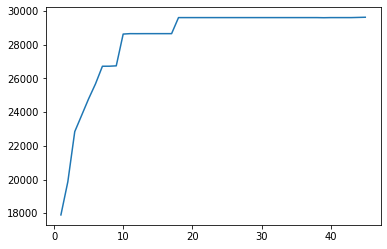

The algorithm has succesfully converged in 45 iterations.
The state returned: HNBIECFDKMLGAJ
Fitness of the returned state: 29626.0


In [15]:
def main():
    print("Enter 0 for 8 Queens.")
    print("Enter 1 for TSP.")
    val = input("Enter your value: ") 
    
    if (val=="0"):
        
        x1_new=genetic_algo_new(l1)
        
        list_temp_x_new=[]
        list_temp_y_new=[]
        for i in new_algo_entries.keys():
            list_temp_x_new.append(i)
            list_temp_y_new.append(new_algo_entries[i])

        x_new=np.array(list_temp_x_new)
        y_new=np.array(list_temp_y_new)
        

        
        f=fitness_function(x1_new)
        
        if(f==29.0):
            print("The algorithm has succesfully converged in",end=" ")
            print(np.amax(x_new),end=" ")
            print("iterations.")
            print("The state returned: ",end="")
            print(x1_new)
            print("Fitness of the returned state: ",end="")
            print(f)
            
        else:
            print("The algorithm did not converge succesfully.")
            print("The best possible solution we could get is with", end=" ")
            print(np.amax(y_new),end=" ")
            print("fitness value.")
        
    else:
        x1_new=ga_tsp_edited(population_tsp)
        
        list_temp_x_new=[]
        list_temp_y_new=[]
        for i in new_algo_entries_tsp.keys():
            list_temp_x_new.append(i)
            list_temp_y_new.append(new_algo_entries_tsp[i])

        x_new=np.array(list_temp_x_new)
        y_new=np.array(list_temp_y_new)

        
        f=cost_function(x1_new)
        
        if(f[1]==29626):
            print("The algorithm has succesfully converged in",end=" ")
            print(np.amax(x_new),end=" ")
            print("iterations.")
            print("The state returned: ",end="")
            print(x1_new.upper())
            print("Fitness of the returned state: ",end="")
            print(f[1])
            
        else:
            print("The algorithm did not converge succesfully.")
            print("The best possible solution we could get is with", end=" ")
            print(np.amax(y_new),end=" ")
            print("fitness value.")
        
    

if __name__=="__main__":
    main()